# Homework 3: Arrays computations

Welcome to the third homework! Please complete this notebook by filling in the cells provided. For all problems that you must write explanations and sentences for, please provide your answer in the designated space. 

**Recommended Reading**: 

* [Brett M (2020)](https://matthew-brett.github.io/dsfe/chapters/01/intro) sections 3.4-3.7.
* Also see chapter 4 of [McKinney (2022)](https://wesmckinney.com/book/numpy-basics) as a reference for a lot more information. 

**Deadline:**

This assignment is due **Sunday September 21st at 11pm.** You can turn in the assignment up to 24 hours late for 90% credit (after that, the homework will only be accepted with a dean's excuse). 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on Canvas. You can also post questions or start discussions on Ed Discussion.


## Getting started

In order to complete the homework it is necessary to download a few files. Please run the code below **only once** to download data needed to complete the homework. To run the code, click in the cell below and press the play buttom (or press shift-enter). 

In [1]:
# if you are running this notebook in colabs, please uncomment and run the following two lines
# !pip install https://github.com/emeyers/YData_package/tarball/master

In [2]:
# Please run this code once to download the files you will need to complete the homework 

import YData 

YData.download_data("ACS_2017_sample_01.csv")
YData.download_data("world_population.csv")
YData.download_data("sp500_data.csv")

YData.download_image("array_cumsum.png")
YData.download_image("array_diff.png")
YData.download_image("Cat.jpg")

The file `ACS_2017_sample_01.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `world_population.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `sp500_data.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `array_cumsum.png` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `array_diff.png` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `Cat.jpg` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


## 0. Quote and reaction

As you know, in class we have been analyzing data on movies related to the Bechdel test. This data comes from a FiveThirtyEight article [The Dollar-And_Cents Case aginst Hollywood's Exclusion of Women](https://fivethirtyeight.com/features/the-dollar-and-cents-case-against-hollywoods-exclusion-of-women/). To understand how the data set we have been analyzing was created, and to see how data journalists have analyzed this data, please read the original article. In the space below, please write down a quote you found of interest from the article along as well as a one paragraph description for why you thought the quote was interesting. 


**Question 0.1 (5 points)**  Please write down your "quote and reaction" here.

*Quote:*  ...

Reaction: ... 

In [3]:
# This cell imports functions from packages we will use below.
# Please run it each time you load the Jupyter notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageio.v3 import imread

%matplotlib inline

## 1. Warm-up: Basic array operations 

As a warm up exerice, let's do some manipulations on the temperatures in New Haven over the past week which are given in the table below. 

| Date        | High (°C) | Low (°C) |
|-------------|-----------|----------|
| Sep 8       | 24        | 12       |
| Sep 9       | 23        | 13       |
| Sep 10      | 19        | 13       |
| Sep 11      | 26        | 14       |
| Sep 12      | 22        | 17       |


**Question 1.1 (3 points)** To start, make a numpy array called `high_temps` that has the high temperatures for each day, and an ndarray called `low_temps` that has the low temperatures for each day. 

Print out these arrays to show that you have created them correctly. 


**Question 1.2 (5 points)** Now since we are in America, let's convert these arrays of temperatures from Celcius to Fahrenheit. As you will recall, the formula to convert from Celcius to Fahrenheit is: $F = \frac{9}{5} \cdot C + 32$. 

Please do this conversion and store the results in an ndarray called `high_temps_F` and `low_temps_F`. Print out these arrays to "show your work". 

Your code should be two lines long, plus two additional lines to print out the results (so four lines in total). 



**Question 1.3 (4 points)** Finally, using the temperatures in degrees Fahrenheit, calculate an array of "temperatures range" for each day by subtracting the maximum from the mininmum temperature on each day. Then print out the largest range value from the array of range values. 

## 2. World Population

The cell below loads a table of estimates of the world population for different years, starting in 1950 and displays the first 4 rows of the data. The estimates come from the [US Census Bureau website](https://www.census.gov/en.html).

In [4]:
# Loading the data in a pandas DataFrame. We will discuss these DataFrames soon. 
world = pd.read_csv("world_population.csv")[['Year', 'Population']]
world.head(4)


,Year,Population
0,1950,2557628654
1,1951,2594939877
2,1952,2636772306
3,1953,2682053389


The name `population` is assigned to a numpy array of population estimates.

In [5]:
population = np.array(world["Population"])    
population

array([2557628654, 2594939877, 2636772306, 2682053389, 2730228104,
       2782098943, 2835299673, 2891349717, 2948137248, 3000716593,
       3043001508, 3083966929, 3140093217, 3209827882, 3281201306,
       3350425793, 3420677923, 3490333715, 3562313822, 3637159050,
       3712697742, 3790326948, 3866568653, 3942096442, 4016608813,
       4089083233, 4160185010, 4232084578, 4304105753, 4379013942,
       4451362735, 4534410125, 4614566561, 4695736743, 4774569391,
       4856462699, 4940571232, 5027200492, 5114557167, 5201440110,
       5288955934, 5371585922, 5456136278, 5538268316, 5618682132,
       5699202985, 5779440593, 5857972543, 5935213248, 6012074922,
       6088571383, 6165219247, 6242016348, 6318590956, 6395699509,
       6473044732, 6551263534, 6629913759, 6709049780, 6788214394,
       6866332358, 6944055583, 7022349283, 7101027895, 7178722893,
       7256490011])

In this question, you will apply some built-in Numpy functions to this array. 

Note: if the images below do not appear, please close and reopen your Jupyter notebook. 

<img src="array_diff.png" style="width: 400px;"/>

The difference function `np.diff` subtracts each element in an array by the element that preceeds it. As a result, the length of the array `np.diff` returns will always be one less than the length of the input array.

<img src="array_cumsum.png" style="width: 400px;"/>

The cumulative sum function `np.cumsum` outputs an array of partial sums. For example, the third element in the output array corresponds to the sum of the first, second, and third elements.

**Question 2.1 (3 points)** Very often in data science, we are interested in understanding how values change with time. Use `np.diff` and `np.max` (or just `max`) to calculate the largest annual change in population between any two consecutive years.

**Question 2.2 (8 points)** In class we discussed the *standard devation* as a statistic that can measure how much values vary. As you will recall, the formula for the standard deviation is: $$s = \sqrt{\frac{1}{n -1} \sum_{i =1}^n (x_i - \bar{x})^2 }$$

As you also recall, we can calculate the standard deviation in Python using either the `statistics` module's standard deviation function `statistics.stdev()` or using the numpy function `np.std()`. Let's now see if we can calculate the standard deviation of the population size from year to year, *without using either of these functions*, and instead just using numpy operations. To do this, please complete the following steps:

1. Calculate the mean (average) population size and store the result in the name `mean_pop`. Do this using only numpy operations as well; i.e., without using `statistics.mean()` or `np.mean()`. In other words, you can use any numpy functions EXCEPT the `mean()` functions to do this.

2. Create an array of values that has the yearly deviations, which are each year's population size minus the overall mean population size calculated across all years (i.e., the value you calculated in step 1). Store this result in the name `yearly_deviations`. 

3. Next calculate the sum of the squared deviations. To do this, first square all the yearly deviation values (to make them positive) and then sum them together. Store the result in the name `sum_squared_deviations`.

4. Divide this `sum_squared_deviations` by the total number of years in the data minus 1 (i.e., by $n - 1$). Save this result in the name `yearly_variance`.

5. Finally, take the square root of the yearly variance to calculate the standard deviation and print out this value to "show your work". 


In [6]:
# Calculate the mean population size



# Calculate the each year's deviation from the mean value



# Calculate the sum of the squared deviations



# Calculate the variance



# Print out the standard deviation



**Question 2.3 (5 points)** Now compare the value you calculated for the standard deviation in Question 2.2, to the results you get from using the `np.std()` function, and from using `statistics.stdev()` function. In particular, print out the standard deviation's calculated using both these functions in the cell below. 

In the answer section below, report if all these values are the same (if they are different, you do not need to explain why, but if you're interested you can try using Google to see if you can come up with a reason). 

Note: In order to use the `statistics.stdev()` function the data must be in a list, rather than in a numpy array. You can convert a numpy array to a list using the `.tolist()` method on the numpy array. 


In [7]:
import statistics







<font color='red'> **ANSWER**: 








## 3. Stock Market Returns



In this set of exercises we will use numpy to explore stock market data. In particular, we will look at the [Standard and Poor's 500 (S&P 500)](https://finance.yahoo.com/quote/%5EGSPC/) which is a stock market index tracking the stock performance of 500 leading companies listed on stock exchanges in the United States. 

The code below loads data on the S&P 500's performance from January 1st 2015 to August 28th 2025 (which is the last date the market was open in August). It then extracts the closing price into a numpy array called `sp500_close` as well as the dates corresponding to each closing price in a numpy array called `dates`. We will analyze data in these `sp500_close` and `dates` numpy arrays to understand stock market returns. 

Note: I am not an stock market expert, and this is a new problem for this year, so if you are a stock market expert and you notice anything that is incorrect in the problems below (or have suggestions how I could write things more clearly), please let me know!


In [8]:
# Load the data
sp500 = pd.read_csv("sp500_data.csv")

# Display the data as a DataFrame
display(sp500)

# Extract numpy arrays with S&P 500 close price and the dates 
sp500_close = sp500.Close.to_numpy()
dates = sp500.Date 
dates = pd.to_datetime(dates, format="%m/%d/%y").to_numpy()  # covert dates to the datetime type


# print the first 5 closing prices and dates
print(sp500_close[0:5])
print(dates[0:5])


,Date,Adj Close,Close,High,Low,Open,Volume
0,1/2/15,2058.199951,2058.199951,2072.360107,2046.040039,2058.899902,2708700000
1,1/5/15,2020.579956,2020.579956,2054.439941,2017.339966,2054.439941,3799120000
2,1/6/15,2002.609985,2002.609985,2030.250000,1992.439941,2022.150024,4460110000
3,1/7/15,2025.900024,2025.900024,2029.609985,2005.550049,2005.550049,3805480000
4,1/8/15,2062.139893,2062.139893,2064.080078,2030.609985,2030.609985,3934010000
...,...,...,...,...,...,...,...
2676,8/25/25,6439.319824,6439.319824,6466.890137,6438.060059,6457.669922,4059070000
2677,8/26/25,6465.939941,6465.939941,6468.370117,6429.209961,6435.490234,4867680000
2678,8/27/25,6481.399902,6481.399902,6487.060059,6457.839844,6462.259766,4143680000
2679,8/28/25,6501.859863,6501.859863,6508.229980,6466.959961,6483.839844,4283760000


[2058.199951 2020.579956 2002.609985 2025.900024 2062.139893]
['2015-01-02T00:00:00.000000000' '2015-01-05T00:00:00.000000000'
 '2015-01-06T00:00:00.000000000' '2015-01-07T00:00:00.000000000'
 '2015-01-08T00:00:00.000000000']


**Question 3.1 (4 points)** To start, create a line plot that displays the S&P 500 index closing prices as a function of the date. As always, be sure to label your axes. 

In [9]:
import matplotlib.pyplot as plt






**Question 3.2 (5 points)** The *relative change* ($r_t$) is defined as: 

$$r_t = ~ \frac{V_{t} - V_{t - 1}}{V_{t-1}}$$ where: 

- $V_{t-1}$ is the value at time *t - 1*
- $V_{t}$ is the value at time *t*

A related quantity is the *percent change*, which is just the relative change multiplied by 100. 

Please now calculate the relative change for *all days* in our `sp500_close` array, and assign the results to the name `daily_relative_change`. 

Once you have created the `daily_relative_change`, plot it as time series showing the *percent change* of the S&P 500 on each date. 

Hint: The `np.diff()` function could be useful here. Also note that since it takes a difference of successive items, `np.diff()` returns a ndarray that is one item shorter than the intial array it was passed. 


**Question 3.3 (8 points)** Please also visualize the daily percent change in two additional ways:

1. As a histogram showing the daily percentage changes
2. As a box plot showing the daily percentage changes

In the answer section, report the advantage of each of these visualizations for understanding the percent changes; i.e., what aspects of the percent changes do each of these plots best highlight. 

In [10]:
# Plot the daily percent changes as a histogram






# Plot the daily percent cage as a box plot








<font color='red'> **ANSWER**: 

1. 



2. 






**Question 3.4 (3 points)** The quantity relative change is related to the amount of money one would have **made** on an investment $V$. In particular, if one invested $V_{t-1}$ dollars at time $t-1$, one would *make* $V_{t - 1} \cdot r_t$ dollars in income on day *t*. 

The total amount of money the investor would **have** at the end of this investment period would be the amount of money *made* ($V_{t-1} \cdot r_t$) plus the amount of money in the initial investment ($V_{t-1}$). I.e., the amount of money one would have is denoted as $V_t$ and is equal to $V_{t-1} \cdot r_t + V_{t-1} ~ = ~ V_{t-1} \cdot (r_t + 1)$

The "growth factor" is denoted using the symbol $R_t$, and is defined as $R_t = r_t + 1$. We can directly get the amount of money would *have* a time *t* using this growth factor; i.e., the amount money we have at day *t* is: $V_{t} ~ = ~ V_{t-1} \cdot R_t$.

Please calculate the growth factors $R_t$ for each day and store the results in the name `daily_growth_factors`. Print out the first 3 growth factors to show your results.

Hint: This is a very easy question!

**Question 3.5 (6 points)** Let's now examine the dates with the largest losses and largest gains. Please do the following: 

1. Use the `np.sort()` function to create an array called `sorted_growth_factors` which has the `daily_growth_factors` sorted from smallest to largest value.
2. Extract the days with the 10 smallest growth factors into an array called `worst_days`.
3. Extract the days with the 10 largest growth factors values into an array called `best_days`.
4. Print out the values in the `worst_days` and `best_days` arrays to show your work.


**Question 3.6 (6 points)** We can get the total amount of money made over n days by multiplying the growth factors together time our initial investment. The reason this works is because if we start with some initial investment $V_0$, then our wealth at the start of each day would be as follows: 

- Day 1 wealth: $V_0$
- Day 2 wealth: $V_0 \cdot R_1$                          &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;    This wealth on day 1, times the day 1 growth factor
- Day 3 wealth: $(V_0 \cdot R_1) \cdot R_2$              &emsp; &emsp;&emsp;&emsp;&nbsp;                     This wealth on day 2, times the day 2 growth factor
- Day 4 wealth: $((V_0 \cdot R_1) \cdot R_2) \cdot R_3$  &emsp;&ensp;                                        This wealth on day 3, times the day 3 growth factor
- etc.

Using mathematical notation, we can write the total wealth after n days as: $$V_0 \cdot \prod_i^n R_i$$

Note: this formula works for any list of growth factors, the growth factors do not need to come from consecutive days.

Using this formula, calculate (and print out) how much an initial investment of \\$100,000 would be worth if one had only invested in 10 worst days (i.e., using the $R_i$'s from the 10 worst days that you calculated in the previous question). Likewise, calculate (and print out) how much an initial investment of \\$100,000 would be worth if one had only invested in 10 best days.

Hint: the `np.prod()` function could be useful. 


## Part 3 bonus questions

In order to make this homework a little shorter, I have made the next two questions on part 3 of the homwork "bonus problems" which are worth 0 points. If you want more practice with NumPy and/or want to learn more about stock market returns, please feel free to complete these questions. Otherwise, feel free to skip them. 



**Question 3.7 (0 points)**  In order to get a measure of the "average daily change" in wealth we can calculate the geometric mean of our growth factors. The geometric mean is defined as: $$GM = \sqrt[n]{R_1 R_2 \cdots R_n} = \left( \prod_{i=1}^{n} R_i \right)^{1/n}$$ where $R_i$ is the growth factor in time period $i$.

Using this formula, calculate the geometric mean of the the S&P 500 growth factors and store the result in the name `gm_growth_factor`. In the code chunk below print out the following values:

1. The `gm_growth_factor`  
2. The average percent change in the S&P 500, which is equal to `gm_growth_factor` minus 1 times 100  
3. The amount of money one would expect to earn in a day if they had invested \\$1,000  


**Side note**: The reason we use the geometric mean, rather than the arithmetic mean, is because in order to calculate how an investment is changing, we multiple it by a sequence of growth factors (as discussed on the previous problem); i.e., if we have a sequence of growth factors $R_i$, our total value at the last time period is $V_0 \cdot \prod_i^n R_i$, so we are looking for a single $R_*$ value such that $V_0 \cdot \prod_i^n R_i = V_0 \cdot \prod_i^n R_*$ or $\prod_i^n R_i = \prod_i^n R_*$. Since $R_*$ is a constant, we get $\prod_i^n R_*= R_*^n$ and solving for $R_*$ we get $R_* = \left( \prod_{i=1}^{n} R_i \right)^{1/n}$ which is the geometric mean. 

**Question 3.8 (0 points)** The national minimum wage in the United States is \\$7.25 per hour. Thus if a person worked an 8 hour day making this minimum wage they would earn, 7.25 * 8 = \\$58 for the day. 

Suppose a given day had the average daily return you calculated in question 3.7. How much money would one need to have invested to earn the amount of money earned in a day one would make if one was paid the national minimum wage? 


## 4. Selecting values through Boolean indexing

As we discussed in class, one way to select elements is through Boolean indexing (also called Boolean masking). Suppose we have a ndarray of values called `my_array`. Then if we have an ndarray of Booleans called `my_booleans` that is the same size as `my_array`, then using `my_array[my_booleans]` will return all the values in `my_array` where the values of `my_booleans` are `True`. 

The code below loads the ACS data from homework 1 and creates lists for the earned income and sex variables. Let's use this data to explore how Boolean masking can be useful!


In [11]:
acs_data1 = pd.read_csv("ACS_2017_sample_01.csv")

# This code converts polars DataFrame data into Python lists so that we can analyze the data
earned_incomes = acs_data1["INCEARN"].to_list()
sex = acs_data1["SEX"].to_list()

acs_data1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,NUMPREC,HHWT,HHTYPE,CLUSTER,CPI99,STATEFIP,...,CLASSWKR,CLASSWKRD,WKSWORK2,UHRSWORK,INCBUS00,INCEARN,SEI,MOVEDIN,QBPL,QINCWAGE
0,2017,201701,250395,2017000834943,2,79,2,2017002503951,0.679,9,...,2,28,0,0,0,0,72,7,0,0
1,2017,201701,1062813,2017000532479,2,27,1,2017010628131,0.679,42,...,0,0,0,0,0,0,0,5,0,0
2,2017,201701,1235164,2017001001296,1,48,6,2017012351641,0.679,48,...,1,13,1,2,50,150,22,4,0,0
3,2017,201701,142278,2017000769070,3,50,1,2017001422781,0.679,6,...,2,22,3,35,0,17900,68,0,0,4
4,2017,201701,954089,2017000012970,5,15,1,2017009540891,0.679,39,...,1,13,2,21,1800,1800,26,0,0,0


**Question 4.1 (3 point)** To start with, please convert the `earned_incomes` list into an ndarray called `earned_incomes_array`. Likewise, convert the `sex` list into an array called `sex_array`. Hint: using the `np.array()` function could be helpful here. 

In [12]:
# create numpy arrays of our data





**Question 4.2 (3 point)** Next, create an array of Booleans called `male_indicators` that has `True` values when the `sex_array` indicates a male, and `False` when the `sex_array` values indicates a female. Likewise create an array called `female_indicators` that has `True` values when the `sex_array` indicates a female, and `False` when the `sex_array` values indicates a male. Print the first 5 entries of the `female_indicators` array to show your code is working correctly. 

In [13]:
# get indicators for males and females





**Question 4.3 (4 point)**. Now let's create an ndarrays called `male_incomes` that has only the earned incomes from males. Likewise, create an ndarrays called `female_incomes` that has only the earned incomes from females. Print out the number of elements in both these arrays to show your code is working correctly (and you can check that you have this correct by looking at these numbers from homework 1). 

In [14]:
# get numpy arrays of males and females



# get male incomes and female incomes





**Question 4.4 (3 point)** Next, print the mean earned incomes for males and for females and print these values (rounded to have no decimal places). 

In [15]:
# get mean values for male and female incomes







## 5. Image manipulation

Let's conclude with some image mainpulation. As we discussed in class, images can be stored as three dimensional NumPy arrays, and we can then use NumPy operations to change their visual appearance. 

Below we load an image of a cat into the name `cat_img`, and we display the image using matplotlib. We will experiment a little with different ways to change this image's appearance. 


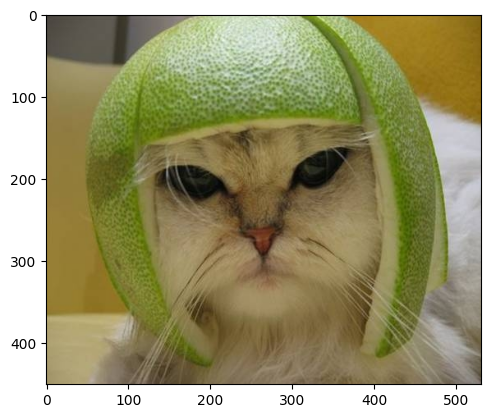

In [16]:

cat_img = imread("Cat.jpg");

plt.imshow(cat_img);


**Question 5.1 (3 point)** To start with please print out the size of the image in terms of its length, width and color depth, and also print out the total number of pixels in the image. 

In [17]:
# the length, width and color depth of the image


# the total number of pixels




**Question 5.2 (5 point)** Now let's experiment with resizing the image. To do this, please take every 12th pixel in both the width and height directions so that you final image size is color image with a length of pixels 38 and a width of 45. Save your resized image to the name `resized_img` and display it using matplotlib. Also, print out the dimensions of the image to show you have the resized it correctly. 

**Question 5.3 (5 point)** Let's now experiment with creating a ["negative" of an image](https://en.wikipedia.org/wiki/Negative_(photography)). To do this, we will reverse the pixel values on each color channel so that value of 0 (i.e., the smallest value) becomes a value of 255 (the largest value), a value of 1 becomes a value of 254, ..., a value of 96 would become 159, ..., a value of 255 would become 0. 

Save the results of your reversed image to the name `neg_image` and display it. 

Hint: This problem is easy!



**Question 5.4 (6 point)** Finally, let's experiment with saturating the values to the most extreme values. In particular, modified the `saturated_img` created below by setting any value (on a given channel pixel channel) that is below 128 to be 0, and any value that is 128 or large to a value of 255. 

Once you have created this saturaged image, display it using matplotlib.

Hint: Boolean masking could be helpful here. 


In [18]:
# create a copy of the image to start with. Modify this saturated_img 
saturated_img = cat_img.copy()

# Add code below to saturate all values to be either 0 or 255 










## 6. Reflection (3 points)

Please reflect on how the homework went by going to Canvas, going to the Quizzes link, and clicking on Reflection on homework 3.



## 7. Submission

Once you're finished filling in and running all cells, you should submit your assignment as a pdf on Gradescope. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. When submitting on Gradescope, please **make sure to select the correct pages of your pdf that correspond to each problem**. Failure to mark pages correctly **will result in points being deducted** from your homework score.

To convert this Jupyter notebook document to a pdf please run the code in the cell below. This should produce a document called `homework_03.pdf` which should appear in the files tab on the left (you might need to refresh the files tab by clicking on `/homework_03/` in the upper part of files tab). You can then right click on this file (command click on a mac), to download this pdf document which you can upload to Gradescope. 

Please be sure to check that all the code and output are visible before submitting your pdf to Gradescope as **points will be deducted for missing code and output that is not visible** since we will not be able to grade this.

In [19]:
%%capture

!quarto render homework_03.ipynb --cache-refresh --to pdf 

#### Alternative submission instructions

If converting your Jupyter notebook to a pdf using the command in the cell above does not work, an alternative way to convert your Jupyter notebook is:

1.  Go to "File" at the top-left of your Jupyter Notebook
2.  Under "Download as" (or "Save and Export Notebook As...") and select "HTML (.html)"
3.  After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
4.  From the print window, select the option to save as a .pdf


If you are running the assignment in a Google Colabs, you can use the following instructions: 
1.  Go to "File" at the top-left of your Jupyter Notebook and select "File" and "Print" (note you will not actually be printing)
2. From the print window, select the option to save as a .pdf
3. Be sure to look over the pdf file to make sure all your code and written work is saved in a clear way.

